In [89]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [90]:
dpw_raw_df = pd.read_csv("data/dpw raw.csv")
pema_raw_df = pd.read_csv("data/pema raw.csv")
pha_raw_df = pd.read_csv("data/pha raw.csv")

In [91]:
dpw_raw_df.head()

,timestamp,id,timestamp_local,sn,rh,temp,lat,lon,device_state,pm1,...,no,no2,o3,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id
0,2025-05-22T23:59:06Z,395227749,2025-05-22T19:59:06Z,MOD-00811,84.6,8.4,41.79521,-71.39783,ACTIVE,0.414,...,2.287,8.407,41.144,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0
1,2025-05-22T23:58:06Z,395227746,2025-05-22T19:58:06Z,MOD-00811,84.8,8.4,41.79521,-71.39783,ACTIVE,0.501,...,2.287,8.383,41.523,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0
2,2025-05-22T23:57:06Z,395227745,2025-05-22T19:57:06Z,MOD-00811,85.0,8.4,41.79521,-71.39783,ACTIVE,0.488,...,2.287,8.360,40.721,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0
3,2025-05-22T23:56:06Z,395227744,2025-05-22T19:56:06Z,MOD-00811,84.7,8.4,41.79521,-71.39783,ACTIVE,0.391,...,2.286,8.385,39.956,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0
4,2025-05-22T23:55:06Z,395227741,2025-05-22T19:55:06Z,MOD-00811,84.1,8.4,41.79521,-71.39783,ACTIVE,0.321,...,2.324,9.356,41.574,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0


In [92]:
pema_raw_df.head()

,timestamp,id,timestamp_local,sn,rh,temp,lat,lon,device_state,wd,...,no2,o3,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id,ws_scalar
0,2025-05-22T16:48:26Z,394979333,2025-05-22T12:48:26Z,MOD-00810,80.2,10.4,41.8522,-71.4198,ACTIVE,50.2,...,18.229,38.547,16071,16072,16073,16132,16139,16146,16125,7.91
1,2025-05-22T16:47:26Z,394979331,2025-05-22T12:47:26Z,MOD-00810,80.0,10.4,41.8522,-71.4198,ACTIVE,39.6,...,17.764,38.948,16071,16072,16073,16132,16139,16146,16125,8.55
2,2025-05-22T16:46:26Z,394979332,2025-05-22T12:46:26Z,MOD-00810,81.0,10.4,41.8522,-71.4198,ACTIVE,55.4,...,17.959,37.704,16071,16072,16073,16132,16139,16146,16125,7.42
3,2025-05-22T16:45:26Z,394979334,2025-05-22T12:45:26Z,MOD-00810,80.6,10.4,41.8522,-71.4198,ACTIVE,27.3,...,17.975,38.890,16071,16072,16073,16132,16139,16146,16125,5.89
4,2025-05-22T16:44:26Z,394977028,2025-05-22T12:44:26Z,MOD-00810,80.6,10.5,41.8522,-71.4198,ACTIVE,46.8,...,18.456,38.100,16071,16072,16073,16132,16139,16146,16125,9.07


In [93]:
pha_raw_df.head()

,timestamp,id,timestamp_local,sn,rh,temp,lat,lon,device_state,wd,...,no2,o3,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id,ws_scalar
0,2025-05-22T23:59:56Z,395229420,2025-05-22T19:59:56Z,MOD-00812,87.3,8.2,41.8171,-71.4553,ACTIVE,359.2,...,7.140,35.587,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,7.50
1,2025-05-22T23:58:56Z,395229418,2025-05-22T19:58:56Z,MOD-00812,87.3,8.2,41.8171,-71.4553,ACTIVE,8.8,...,7.137,35.986,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,6.19
2,2025-05-22T23:57:56Z,395227167,2025-05-22T19:57:56Z,MOD-00812,87.1,8.2,41.8171,-71.4553,ACTIVE,358.4,...,8.085,35.208,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,7.43
3,2025-05-22T23:56:56Z,395227168,2025-05-22T19:56:56Z,MOD-00812,87.1,8.2,41.8171,-71.4553,ACTIVE,358.3,...,8.085,35.607,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,6.56
4,2025-05-22T23:55:56Z,395227174,2025-05-22T19:55:56Z,MOD-00812,87.2,8.2,41.8171,-71.4553,ACTIVE,3.8,...,8.308,35.199,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,7.24


In [94]:
dpw_raw_df["datetime_utc"] = pd.to_datetime(dpw_raw_df["timestamp"])


dpw_raw_df = dpw_raw_df.drop(columns=["timestamp", "timestamp_local"])

cols_to_remove = [
    "id", "sn", "rh", "temp", "lat", "lon", 
    "pm1", "pm25", "pm10", "co", "no", "no2", 
    "pm1_model_id", "pm25_model_id", "pm10_model_id", "co_model_id", 
    "no_model_id", "no2_model_id", "o3_model_id"
]

dpw_raw_df = dpw_raw_df.drop(columns=cols_to_remove)

dpw_raw_df.loc[dpw_raw_df["o3"] < 0, "o3"] = np.nan

cols = dpw_raw_df.columns.tolist()
cols.insert(0, cols.pop(cols.index("datetime_utc")))
dpw_raw_df = dpw_raw_df[cols]

dpw_raw_df.head()

,datetime_utc,device_state,o3
0,2025-05-22 23:59:06+00:00,ACTIVE,41.144
1,2025-05-22 23:58:06+00:00,ACTIVE,41.523
2,2025-05-22 23:57:06+00:00,ACTIVE,40.721
3,2025-05-22 23:56:06+00:00,ACTIVE,39.956
4,2025-05-22 23:55:06+00:00,ACTIVE,41.574


In [95]:
pema_raw_df["datetime_utc"] = pd.to_datetime(pema_raw_df["timestamp"])


pema_raw_df = pema_raw_df.drop(columns=["timestamp", "timestamp_local"])

cols_to_remove = [
    "id", "sn", "rh", "temp", "lat", "lon", "ws", "wd",
    "pm1", "pm25", "pm10", "co", "no", "no2", 
    "pm1_model_id", "pm25_model_id", "pm10_model_id", "co_model_id", 
    "no_model_id", "no2_model_id", "o3_model_id", "ws_scalar"
]

pema_raw_df = pema_raw_df.drop(columns=cols_to_remove)

cols = pema_raw_df.columns.tolist()
cols.insert(0, cols.pop(cols.index("datetime_utc")))
pema_raw_df = pema_raw_df[cols]

pema_raw_df.head()

,datetime_utc,device_state,o3
0,2025-05-22 16:48:26+00:00,ACTIVE,38.547
1,2025-05-22 16:47:26+00:00,ACTIVE,38.948
2,2025-05-22 16:46:26+00:00,ACTIVE,37.704
3,2025-05-22 16:45:26+00:00,ACTIVE,38.890
4,2025-05-22 16:44:26+00:00,ACTIVE,38.100


In [96]:
pha_raw_df["datetime_utc"] = pd.to_datetime(pha_raw_df["timestamp"])


pha_raw_df = pha_raw_df.drop(columns=["timestamp", "timestamp_local"])

cols_to_remove = [
    "id", "sn", "rh", "temp", "lat", "lon", "ws", "wd",
    "pm1", "pm25", "pm10", "co", "no", "no2", 
    "pm1_model_id", "pm25_model_id", "pm10_model_id", "co_model_id", 
    "no_model_id", "no2_model_id", "o3_model_id", "ws_scalar"
]

pha_raw_df = pha_raw_df.drop(columns=cols_to_remove)

cols = pha_raw_df.columns.tolist()
cols.insert(0, cols.pop(cols.index("datetime_utc")))
pha_raw_df = pha_raw_df[cols]

pha_raw_df.head()

,datetime_utc,device_state,o3
0,2025-05-22 23:59:56+00:00,ACTIVE,35.587
1,2025-05-22 23:58:56+00:00,ACTIVE,35.986
2,2025-05-22 23:57:56+00:00,ACTIVE,35.208
3,2025-05-22 23:56:56+00:00,ACTIVE,35.607
4,2025-05-22 23:55:56+00:00,ACTIVE,35.199


In [97]:
#cutoff ensures all dataframes are roughly the same size
cutoff_time = pd.to_datetime("2025-05-22 15:59:00+00:00")


dpw_raw_df = dpw_raw_df[dpw_raw_df["datetime_utc"] <= cutoff_time].copy()
pema_raw_df = pema_raw_df[pema_raw_df["datetime_utc"] <= cutoff_time].copy()
pha_raw_df = pha_raw_df[pha_raw_df["datetime_utc"] <= cutoff_time].copy()

In [98]:
def analyze_df(df):
    df["datetime_utc"] = pd.to_datetime(df["datetime_utc"])

    df = df.sort_values("datetime_utc").reset_index(drop=True)

    data_present = (~df["o3"].isna()).astype(int)

    plt.figure(figsize=(12, 1.5))
    plt.fill_between(df["datetime_utc"], 0, 1, where=data_present == 1, 
                     color='green', step='post', label='Data Present')
    plt.fill_between(df["datetime_utc"], 0, 1, where=data_present == 0, 
                     color='red', step='post', label='Missing Data')
    plt.yticks([])
    plt.xlabel("Datetime (UTC)")
    plt.title("Timeline of Data Availability")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,5))
    plt.hist(df["o3"].dropna(), bins=30, color="dodgerblue", edgecolor="black")
    plt.title("Histogram of Ozone (O3) Values")
    plt.xlabel("O3")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    print("Descriptive Statistics for O3:")
    print(df["o3"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))


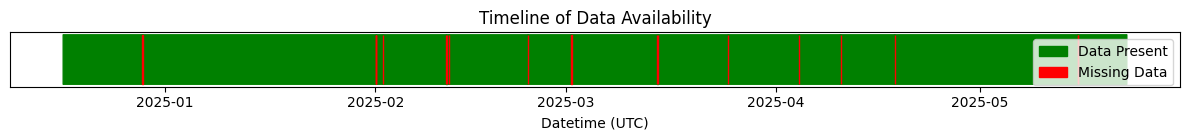

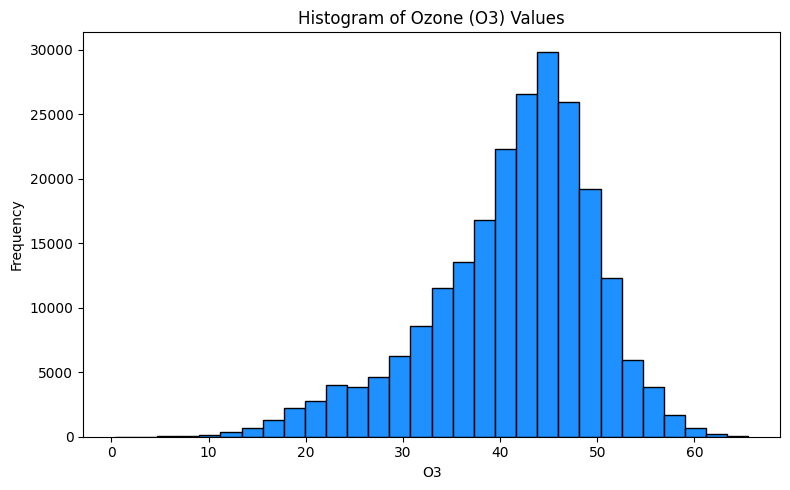

Descriptive Statistics for O3:
count    225240.000000
mean         41.316549
std           8.475139
min           0.343000
25%          36.758750
50%          42.801000
75%          47.052000
90%          50.635000
95%          52.819050
max          65.546000
Name: o3, dtype: float64


In [99]:
analyze_df(dpw_raw_df)

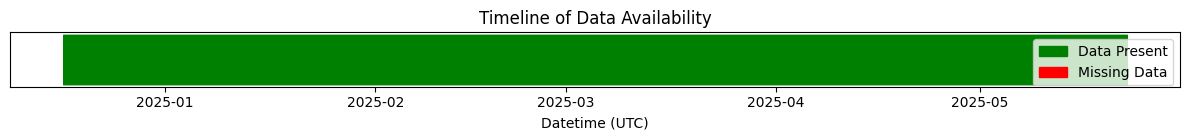

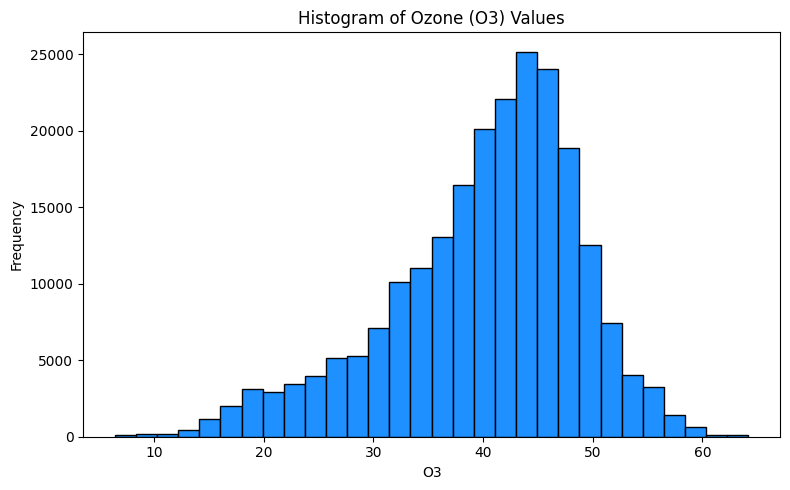

Descriptive Statistics for O3:
count    225594.000000
mean         40.166565
std           8.735891
min           6.428000
25%          35.339250
50%          41.731000
75%          46.188000
90%          49.745700
95%          52.078000
max          64.190000
Name: o3, dtype: float64


In [100]:
analyze_df(pema_raw_df)

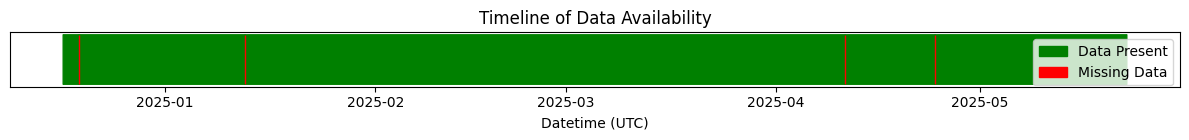

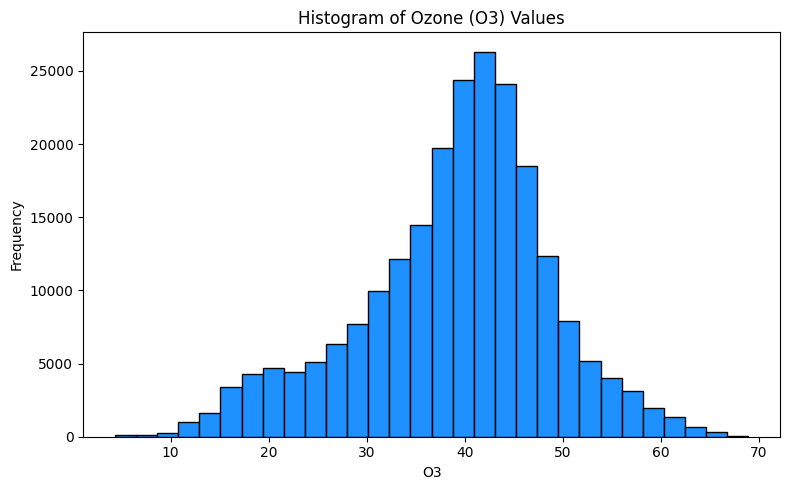

Descriptive Statistics for O3:
count    225278.000000
mean         38.993481
std           9.800131
min           4.298000
25%          33.620250
50%          40.308000
75%          45.125000
90%          50.009000
95%          53.949000
max          68.927000
Name: o3, dtype: float64


In [101]:
analyze_df(pha_raw_df)

In [102]:
dpw_raw_df["datetime_utc"] = pd.to_datetime(dpw_raw_df["datetime_utc"])
dpw_raw_df = dpw_raw_df.set_index("datetime_utc")

pema_raw_df["datetime_utc"] = pd.to_datetime(pema_raw_df["datetime_utc"])
pema_raw_df = pema_raw_df.set_index("datetime_utc")

pha_raw_df["datetime_utc"] = pd.to_datetime(pha_raw_df["datetime_utc"])
pha_raw_df = pha_raw_df.set_index("datetime_utc")

dpw_hourly_o3 = dpw_raw_df["o3"].resample("h").mean().reset_index()
pema_hourly_o3 = pema_raw_df["o3"].resample("h").mean().reset_index()
pha_hourly_o3 = pha_raw_df["o3"].resample("h").mean().reset_index()


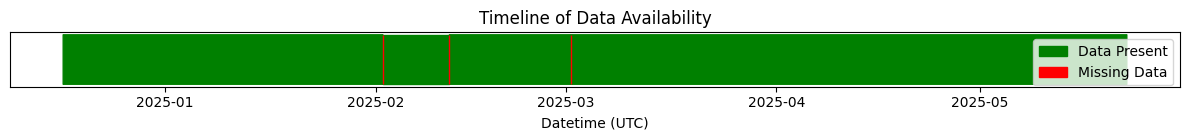

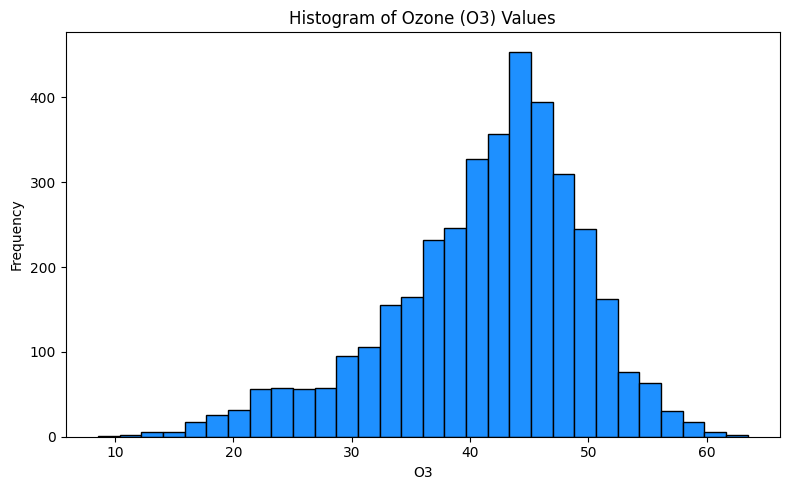

Descriptive Statistics for O3:
count    3757.000000
mean       41.307925
std         8.230990
min         8.573375
25%        36.809533
50%        42.749733
75%        46.859300
90%        50.489090
95%        52.632117
max        63.451050
Name: o3, dtype: float64


In [105]:
analyze_df(dpw_hourly_o3)

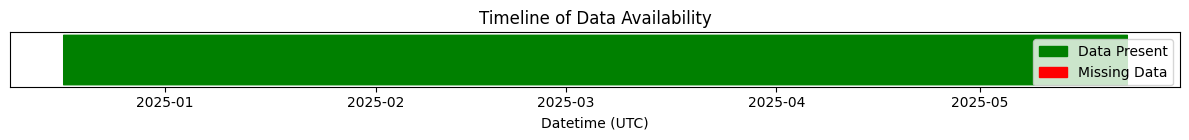

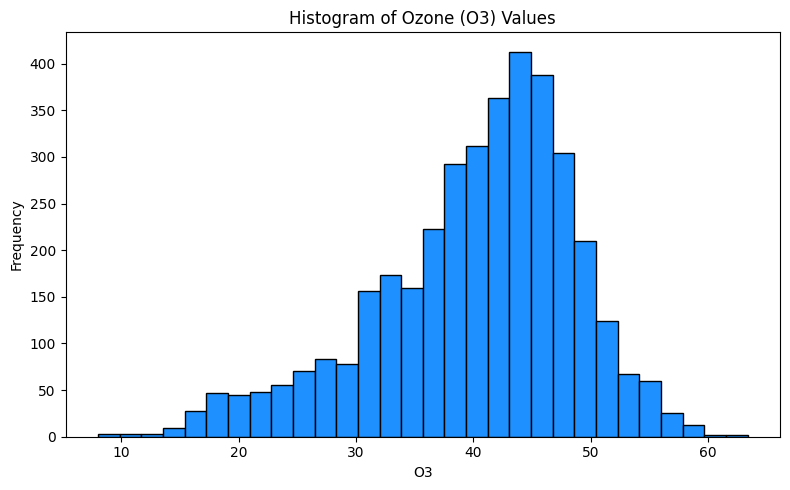

Descriptive Statistics for O3:
count    3760.000000
mean       40.166336
std         8.604725
min         8.012267
25%        35.409158
50%        41.681917
75%        46.079308
90%        49.614380
95%        51.847982
max        63.367300
Name: o3, dtype: float64


In [106]:
analyze_df(pema_hourly_o3)

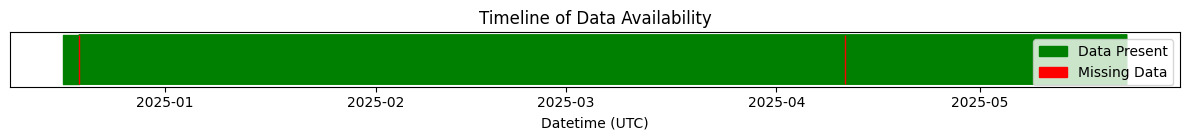

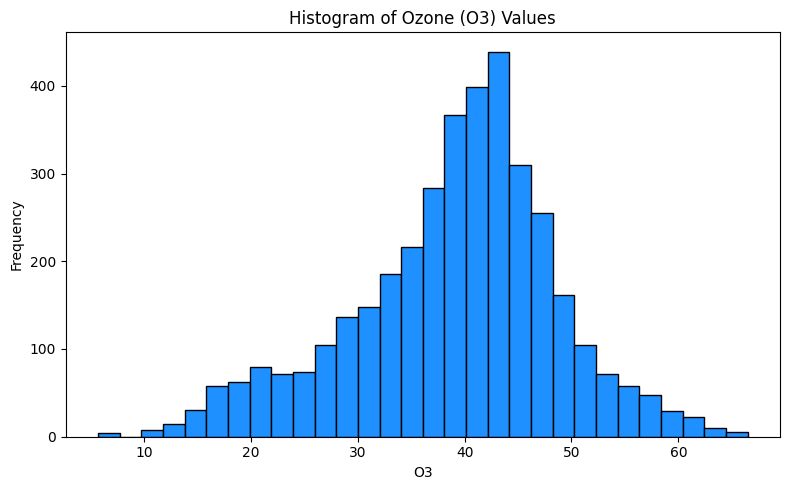

Descriptive Statistics for O3:
count    3758.000000
mean       38.996785
std         9.682847
min         5.697133
25%        33.539612
50%        40.271825
75%        45.112158
90%        49.885545
95%        53.870088
max        66.477067
Name: o3, dtype: float64


In [107]:
analyze_df(pha_hourly_o3)

In [ ]:
import os

dpw_hourly_o3.to_csv("data/dpw_hourly_o3.csv", index=False)
pema_hourly_o3.to_csv("data/pema_hourly_o3.csv", index=False)
pha_hourly_o3.to_csv("data/pha_hourly_o3.csv", index=False)
